# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the 20-Agent Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='./Reacher_Linux/Reacher.x86_64', no_graphics=True)

# Uncomment to enable graphics rendering
# env = UnityEnvironment(file_name='./Reacher_Linux/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


When finished, you can close the environment.

In [ ]:
# Don't close if going to run code codeblock below
# env.close()

### 3. Train a 20-Agent Solution 

Now that we have an understanding of the environment, let's train an AI to solve it! For this we will use [Proximal Policy Optimization](https://arxiv.org/abs/1707.06347) in an actor-critic form and [Generalized Advantage Function](https://arxiv.org/abs/1506.02438).

From command line, run:

```bash
python continuous_control_training_script.py --exp-name my_experiment --gae-lambda 0.9
```

A command line execution like this makes it easier to run multiple different experiments with various inputs without having to modify files.

Below is copy of the code in `conintuous_control_training_script.py` so that it can be run in this notebook

In [5]:
from continuous_control_brain_agent import ActorCriticMind, train_actor_critic_mind

gae_lambda = 0.9
exp_name = "my_experiment"

# create environment (already initialized in notebook)
# env = UnityEnvironment(file_name='./Reacher_Linux/Reacher.x86_64', no_graphics=True)

# create a learning agent ('mind')
brain_name = env.brain_names[0]
ppo_mind = ActorCriticMind(
    brain_name, 
    env.brains[brain_name], 
    policy_lr=2e-4, 
    value_lr=1e-3)

# get number of agents
env_info = env.reset(train_mode=True)[brain_name]
n_agents = len(env_info.agents)

# run training
train_actor_critic_mind(env, ppo_mind, n_agents,
    n_episodes = 200,
    save_rate = 1,
    n_epochs = 4,
    desired_batch_size = 64,
    desired_minibatch_size = 16,
    gamma = 0.9,
    lam = gae_lambda,
    prefix = exp_name,
    beta_start = 0.1, beta_end = 0.0005, beta_decay = 0.99,
    epsilon_start=0.3, epsilon_end=0.1, epsilon_decay = 0.99,
    v_epsilon_start=0.3, v_epsilon_end=0.1, v_epsilon_decay=0.99)

# clean up
env.close()

Episode: 1, training batch: 16, score: 0.347000, policy loss: -0.094256, value loss: 0.000091
Episode: 2, training batch: 32, score: 0.769500, policy loss: -0.080812, value loss: 0.000133
Episode: 3, training batch: 48, score: 1.043500, policy loss: -0.072408, value loss: 0.000376
Episode: 4, training batch: 64, score: 0.825500, policy loss: -0.061641, value loss: 0.000063
Episode: 5, training batch: 80, score: 1.312500, policy loss: -0.051310, value loss: 0.000066
Episode: 6, training batch: 96, score: 1.812000, policy loss: -0.045382, value loss: 0.000332
Episode: 7, training batch: 112, score: 2.689500, policy loss: -0.040280, value loss: 0.000311
Episode: 8, training batch: 128, score: 2.779000, policy loss: -0.034303, value loss: 0.000311
Episode: 9, training batch: 144, score: 2.495000, policy loss: -0.028925, value loss: 0.000248
Episode: 10, training batch: 160, score: 3.045500, policy loss: -0.030346, value loss: 0.000466
Episode: 11, training batch: 176, score: 3.106500, poli

Episode: 86, training batch: 1376, score: 37.904999, policy loss: 0.001363, value loss: 0.000108
Episode: 87, training batch: 1392, score: 37.938999, policy loss: -0.001001, value loss: 0.000021
Episode: 88, training batch: 1408, score: 38.358499, policy loss: 0.001351, value loss: 0.000090
Episode: 89, training batch: 1424, score: 38.621999, policy loss: -0.001919, value loss: 0.000004
Episode: 90, training batch: 1440, score: 37.809999, policy loss: -0.001368, value loss: 0.000001
Episode: 91, training batch: 1456, score: 37.923499, policy loss: -0.001274, value loss: 0.000000
Episode: 92, training batch: 1472, score: 38.284999, policy loss: -0.000876, value loss: 0.000008
Episode: 93, training batch: 1488, score: 38.516999, policy loss: -0.000167, value loss: 0.000021
Episode: 94, training batch: 1504, score: 38.511499, policy loss: 0.000537, value loss: 0.000059
Episode: 95, training batch: 1520, score: 38.455999, policy loss: 0.000316, value loss: 0.000085
Episode: 96, training ba

Episode: 169, training batch: 2704, score: 38.631999, policy loss: -0.000934, value loss: 0.000013
Episode: 170, training batch: 2720, score: 39.008499, policy loss: -0.001029, value loss: 0.000000
Episode: 171, training batch: 2736, score: 38.496999, policy loss: -0.000974, value loss: 0.000033
Episode: 172, training batch: 2752, score: 38.662999, policy loss: -0.000867, value loss: 0.000000
Episode: 173, training batch: 2768, score: 38.607999, policy loss: 0.001860, value loss: 0.000071
Episode: 174, training batch: 2784, score: 38.108499, policy loss: -0.001932, value loss: 0.000002
Episode: 175, training batch: 2800, score: 38.722999, policy loss: -0.000774, value loss: 0.000037
Episode: 176, training batch: 2816, score: 38.531999, policy loss: -0.000972, value loss: 0.000067
Episode: 177, training batch: 2832, score: 38.493499, policy loss: -0.001699, value loss: 0.000000
Episode: 178, training batch: 2848, score: 38.475999, policy loss: -0.000625, value loss: 0.000063
Episode: 17

### 4. Analyze Results

Once training data is generated and stored, we can plot the results and visualize the trained agents. The training scores are saved in `*_scores.pkl` files and the trained networks are stored in `*_policy_checkpoint.pth` files. 

#### Plottting Learning Curves

Assuming your experiments are saved in the same directory as this code (which they will be by default), you can To plot the results from multiple training experiments side-by-side using this command line in the terminal
```bash
python training_analysis.py my_experiment_1_scores.pkl my_experiment_2_scores.pkl my_experiment_3_scores.pkl
```
Below is code that runs an equivalent command as the command line input

/home/ross/miniconda2/envs/public_drlnd/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ross/miniconda2/envs/public_drlnd/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


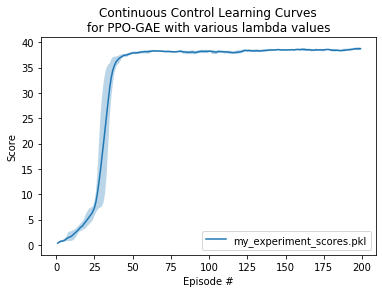

/home/ross/miniconda2/envs/public_drlnd/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


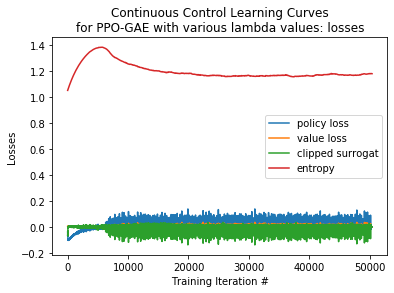

In [10]:
from training_analysis import plot_actor_critic_results

plot_actor_critic_results(
    algorithm_results_list=["my_experiment_scores.pkl"], 
    window_len=10,
    plt_title="Continuous Control Learning Curves\nfor PPO-GAE with various lambda values")